Introduction: Introduce the project, your approach, talk about the process of how you came up with the metric and some alternatives you may have explored.



# **Our project determines what the best Pittsburgh neighborhood is to move into for new people**
* #### It does this by comparing household income to household debt and how often crimes occur in the area


The Metric: Describe your metric, what features are you measuring. What datasets are you using?

### The Metric:

**Average income / Total sum of Neighborhood crime severity numbers + Amount of houses with 2nd mortgages**

The Best Neighborhood: Apply the metric from the previous section to determine the best neighborhood in Pittsburgh. Beyond just executing code, provide a narrative about why you think this is the best neighborhood. Incorporate a data visualization, perhaps to rank all of the neighborhoods or show a neighborhood’s best-ness over time. The key is to make a data driven argument.

{'Overbrook': 39255.0, 'Beltzhoover': 32066.0, 'Brookline': 123946.0, 'Lower Lawrenceville': 36024.0, 'South Side Flats': 209068.0, 'Crafton Heights': 42583.0, 'Bedford Dwellings': 39956.0, 'Homewood South': 77431.0, 'Central Business District': 294090.0, 'Hazelwood': 77763.0, 'East Hills': 57721.0, 'Larimer': 48182.0, 'East Liberty': 107576.0, 'Elliott': 38808.0, 'Bluff': 76150.0, 'Bloomfield': 98780.0, 'Upper Lawrenceville': 27466.0, 'West End': 25943.0, 'Brighton Heights': 81289.0, 'East Allegheny': 73790.0, 'Stanton Heights': 26371.0, 'Squirrel Hill South': 107362.0, 'Mount Washington': 117671.0, 'Carrick': 154705.0, 'Squirrel Hill North': 56570.0, 'Homewood North': 83428.0, 'Allegheny Center': 43078.0, 'Middle Hill': 55641.0, 'Highland Park': 66042.0, 'Bon Air': 19761.0, 'Arlington': 24461.0, 'Point Breeze': 34288.0, 'Fairywood': 11021.0, 'Perry North': 38691.0, nan: 75029.0, 'West Oakland': 32856.0, 'Upper Hill': 26386.0, 'Knoxville': 70855.0, 'Troy Hill': 34835.0, 'Allentown': 7

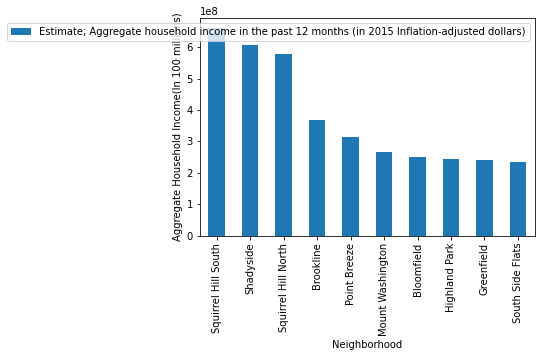

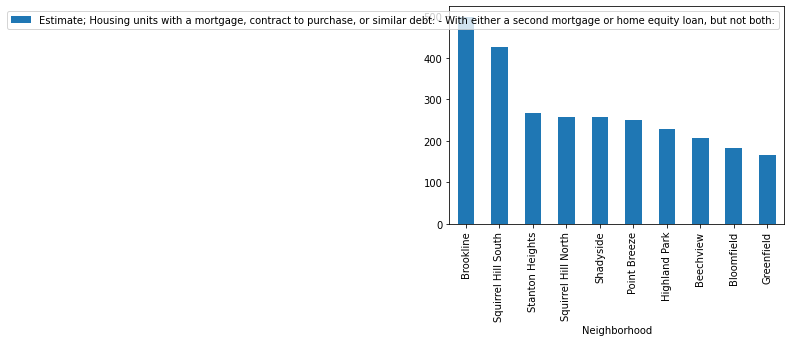

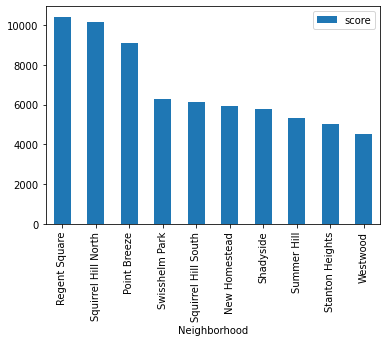

In [78]:
import pandas as pd
import numpy as np

income = pd.read_csv("aggregatehouseholdincome.csv", index_col="Id")
income["Estimate; Aggregate household income in the past 12 months (in 2015 Inflation-adjusted dollars)"] = pd.to_numeric(income["Estimate; Aggregate household income in the past 12 months (in 2015 Inflation-adjusted dollars)"], errors='coerce')
income = income.dropna(subset=["Estimate; Aggregate household income in the past 12 months (in 2015 Inflation-adjusted dollars)"])
income["Estimate; Aggregate household income in the past 12 months (in 2015 Inflation-adjusted dollars)"] = income["Estimate; Aggregate household income in the past 12 months (in 2015 Inflation-adjusted dollars)"].astype(int)
income.nlargest(10, "Estimate; Aggregate household income in the past 12 months (in 2015 Inflation-adjusted dollars)").plot(kind='bar', x='Neighborhood', ylabel="Aggregate Household Income(In 100 millions)")

mone= "Estimate; Aggregate household income in the past 12 months (in 2015 Inflation-adjusted dollars)"
mtwo= "Estimate; Housing units with a mortgage, contract to purchase, or similar debt: - With either a second mortgage or home equity loan, but not both:"
#YO WE'RE MEASURING DEBT WITH HOUSEHOLDS THAT TOOK A SECOND MORTGAGE
households= pd.read_csv("debt.csv", index_col="Id")
households.nlargest(10, mtwo).plot(kind='bar', x='Neighborhood', y=mtwo)

crime = pd.read_csv("crime.csv", low_memory=False)
crime["HIERACRCHY"] = pd.to_numeric(crime["HIERARCHY"], errors='coerce')
crime = crime.dropna(subset=["HIERARCHY"])

higherdic = dict()

for i, row in crime.iterrows():
    if row['INCIDENTNEIGHBORHOOD'] not in higherdic:
        higherdic[row['INCIDENTNEIGHBORHOOD']] = row['HIERARCHY']
    else: higherdic[row['INCIDENTNEIGHBORHOOD']] += row['HIERARCHY']

print(higherdic)
hoods = pd.DataFrame.from_dict(higherdic, orient='index', columns=['Crime'])
income.set_index('Neighborhood')
full = income.join(hoods, on='Neighborhood')
extract = households[mtwo]
full = full.join(extract)
full['score'] = (full[mone]/(full[mtwo]+full['Crime']))

full.nlargest(10, 'score').plot(kind='bar', x='Neighborhood', y='score')

#hoods = pd.merge(income, crime, left_on='Neighborhood', right_on='INCIDENTNEIGHBORHOOD')

Conclusion: Reflect on how the data driven determination of “best neighborhood” is the same or different from your personal favorite neighborhood. Each member of the group should write their own response to this.

## The best neighborhood according to dumbasses is: **drum roll**

# **Squirrel Hill North**